<a href="https://colab.research.google.com/github/TheFox9711/MLPNS_LVolpi/blob/main/KNearestNeighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl
import scipy
from scipy.spatial.distance import cdist

np.random.seed(166)

In [2]:
# Creiamo il feature space cioè lo spazio dei parametri conosciuti, con dati arbitrari
data = np.random.randn(100, 2)

# Assegniamo un label a ogni dato
labels = np.random.randint(0, 2, 100)
labels

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

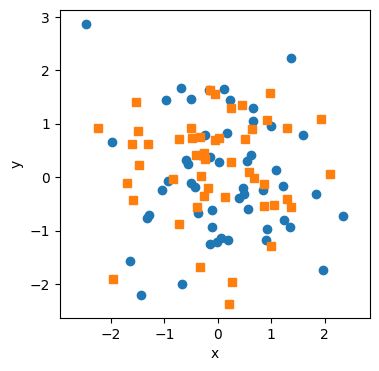

In [3]:
ax = pl.figure(figsize=(4,4)).add_subplot(111)
ax.axis('equal')

ax.plot(data[:,0][labels == 0], data[:,1][labels == 0], 'o')
ax.plot(data[:,0][labels == 1], data[:,1][labels == 1], 's')
ax.set_xlabel('x')
ax.set_ylabel('y');

In [4]:
# Creiamo una particella di test e vediamo a cosa è più vicina
testparticle = np.random.randn(2)
testparticle

array([0.65074331, 0.72586895])

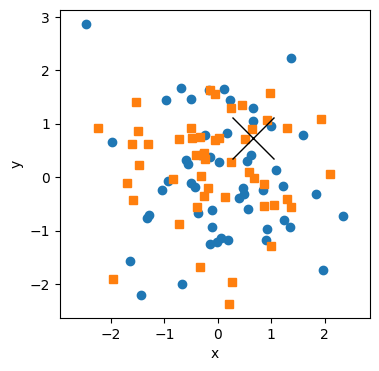

In [5]:
ax = pl.figure(figsize=(4,4)).add_subplot(111)
ax.axis('equal')

ax.plot(data[:,0][labels == 0], data[:,1][labels == 0], 'o')
ax.plot(data[:,0][labels == 1], data[:,1][labels == 1], 's')
ax.plot(testparticle[0], testparticle[1], 'kx', ms=30, lw=3)
ax.set_xlabel('x')
ax.set_ylabel('y');

In [6]:
# Calcoliamo la distanza della particella test da tutte le altre
d = cdist(np.atleast_2d(testparticle), data)
d

array([[1.28314783, 0.65485035, 0.95464291, 2.50145579, 1.83309111,
        1.32635097, 1.30629767, 2.11404144, 0.14700769, 2.52619295,
        1.77653379, 2.71248899, 3.12495632, 1.6510227 , 1.05602692,
        0.6754323 , 2.18881337, 2.47244114, 0.42256109, 2.25416897,
        1.72703948, 0.43668162, 1.91658903, 3.02353558, 0.89208358,
        0.49453631, 1.79473071, 0.95459896, 1.16006302, 2.0478452 ,
        0.97472344, 3.59454531, 1.94201068, 0.83063368, 1.41326386,
        1.41817081, 0.99038919, 1.47233756, 1.9596676 , 2.59322707,
        0.873539  , 3.70361541, 2.15145508, 2.22912726, 1.28837714,
        0.17140356, 0.9119448 , 2.62545432, 2.28672514, 0.73661408,
        0.42959467, 0.73241366, 1.64496339, 0.62609157, 1.2985717 ,
        1.64096815, 0.59364989, 1.36705865, 1.96456744, 1.71269331,
        1.67671083, 1.53884957, 1.96286713, 1.56925992, 3.77566324,
        2.04869536, 1.078408  , 1.24361042, 1.07021739, 1.66467812,
        1.10604985, 0.30659294, 2.78425654, 3.23

In [7]:
np.argmin(d)  # Indice particella più vicina

8

In [9]:
# Verifichiamo che tutto sia corretto:
np.min(d), d[:, np.argmin(d)]

(0.14700769103038863, array([0.14700769]))

In [10]:
labeltest = labels[np.argmin(d)]

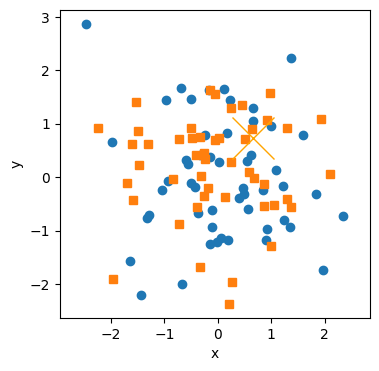

In [12]:
ax = pl.figure(figsize=(4,4)).add_subplot(111)
ax.axis('equal')

colors = ['blue', 'orange']
ax.plot(data[:,0][labels == 0], data[:,1][labels == 0], 'o')
ax.plot(data[:,0][labels == 1], data[:,1][labels == 1], 's')
# Coloriamo la particella test in base al label del punto più vicino
ax.plot(testparticle[0], testparticle[1], 'x', ms=30, lw=3, color=colors[labeltest])
ax.set_xlabel('x')
ax.set_ylabel('y');

In [13]:
k = 5
nns = data[np.argsort(d)][0][:k]  # Trovo i k oggetti più vicini
nns

array([[0.50481266, 0.70810643],
       [0.63401297, 0.89645405],
       [0.62632665, 0.42024981],
       [0.65715557, 1.04361485],
       [1.00098637, 0.96227469]])

In [14]:
nnslabel = labels[np.argsort(d)][0][:k]
nnslabel

array([1, 1, 0, 0, 0])

In [15]:
# Assegniamo alla particella test il label in base al numero maggiore di labels in nnslabel
labeltest2 = 0 if (nnslabel == 0).sum() > (nnslabel == 1).sum() else 1

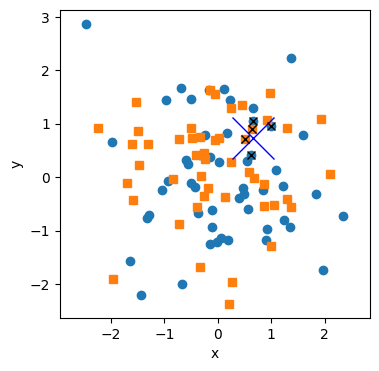

In [17]:
ax = pl.figure(figsize=(4,4)).add_subplot(111)
ax.axis('equal')

colors = ['blue', 'orange']
ax.plot(data[:,0][labels == 0], data[:,1][labels == 0], 'o')
ax.plot(data[:,0][labels == 1], data[:,1][labels == 1], 's')
ax.plot(testparticle[0], testparticle[1], 'x', ms=30, lw=3, color=colors[labeltest2])
ax.plot(nns[:,0], nns[:,1], 'kx')
ax.set_xlabel('x')
ax.set_ylabel('y');